# Videos and Exercises for Session 3: Data Structuring in Pandas II

In this combined teaching module and exercise set, you will continue working with structuring data. 

In the last session, you were working with making operations on relatively clean data. However, before it is meaningful to make such operations, you will (as a data scientist) often have to do some very preliminary cleaning, involving for instance dealing with missings and duplicates as well as combining and restructuring larger sets of data. These are among the topics that we will be focusing on today.

The notebook is structured as follows:
1. Missings and Duplicated Data:
    - Handling Missings: Delete or Interpolate?
    - Spotting and Interpreting Duplicates
2. Combining Data Sets:
    - Intro to `merge`, `concat` and `join`
    - Horizontal and Vertical Merging
3. Split-Apply-Combine
    - Finding Means and Other Characteristics from Data Subsets (aggregation)
4. Reshaping Data
    - Wide and Long Data
    - Intro to `stack`

## Loading
Before we get started.... load in the required modules and set up the plotting library!

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

#  Part 1: Duplicates and Missings

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. This is an extract from the US Census containing almost 50,000 rows of individual-level micro data from 1994.


> **Ex. 3.1.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.
>
> _Hint 1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 
>
> _Hint 2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [2]:
my_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
my_df = pd.read_csv(my_url, skipinitialspace = True, header = None)
cols = ['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']
my_df.columns = cols
my_df.loc[25:35]

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K


##  Missing data

Often our data having information missing, e.g. one row lacks data on education for a specific person. Watch the video below about missing data type and get some simple tools to deal with the problem.

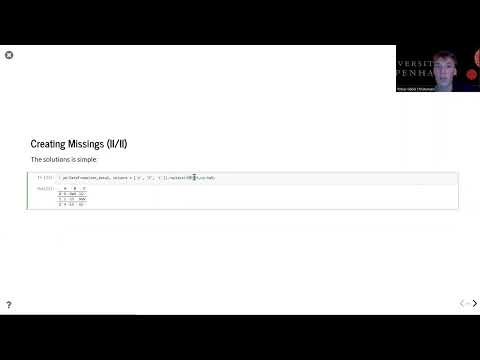

In [3]:
YouTubeVideo('mX6uMt_1-Lk', width=640, height=360)

> **Ex. 3.1.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. Store this new dataframe as `df_census_new`. How many rows are removed in this operation?
> 
> _Hint:_ NaN from NumPy might be useful. What you should discover here is that pandas indeed has native methods for dealing with missings.

In [4]:
from numpy import NaN

my_df = my_df.replace('?',NaN)
df_census_new = my_df.dropna(axis=0)
df_census_new.loc[25:35]

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
35,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K


##  Duplicated Data

Watch the video below about duplicated data and how to handle such observations.

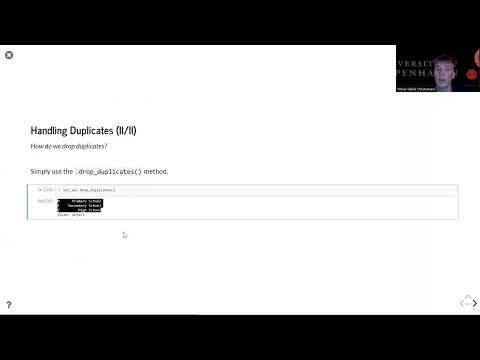

In [5]:
YouTubeVideo('aQrqhJnHIqQ', width=640, height=360)

> **Ex. 3.1.3:** Determine whether or not duplicated rows is a problem in the NOAA weather data and the US census data. You should come up with arguments from the structure of the rows.
>
> *Hint:* Just use the `load_weather()` function from the last module (provided below) to load weather data from 1863 only.

In [6]:
def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out

In [7]:
weather_df = load_weather(1863)
weather_df.duplicated()
print(weather_df[weather_df.duplicated()])
print(df_census_new[df_census_new.duplicated()])
df_census_new.drop_duplicates()

Empty DataFrame
Columns: [station, datetime, obs_type, obs_value]
Index: []
       age         workclass  fnlwgt          educ  educ_num  \
4881    25           Private  308144     Bachelors        13   
5104    90           Private   52386  Some-college        10   
9171    21           Private  250051  Some-college        10   
11631   20           Private  107658  Some-college        10   
13084   25           Private  195994       1st-4th         2   
15059   21           Private  243368     Preschool         1   
17040   46           Private  173243       HS-grad         9   
18698   19           Private   97261       HS-grad         9   
21318   19           Private  138153  Some-college        10   
21490   19           Private  146679  Some-college        10   
21875   49           Private   31267       7th-8th         4   
22300   25           Private  195994       1st-4th         2   
22367   44           Private  367749     Bachelors        13   
22494   49  Self-emp-not-inc

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Part 2: Combining Data Sets

Below we hear about how different datasets can be combined into one, by merging on overlapping information that exists in both datasets.

**Note:** In the video, we are only dealing with one-to-one joins. This is a type of merge where there is only one row with a given merge key in each data frame. However, you may encounter situations where there are multiple rows that share the value of a merge key. In this situation, you may perform a one-to-many join or a many-to-many join that forms a Cartesian product of your rows.

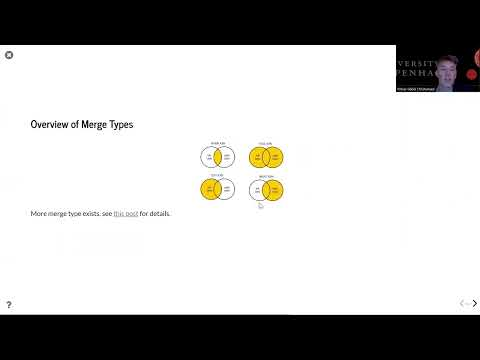

In [8]:
YouTubeVideo('y2YL_cMp8v0', width=640, height=360)

We now continue with structuring weather data. Use the function `load_weather()` for fetching and structuring weather data that you also used above.

> **Ex. 3.2.1:** Get the processed data from years 1870-1875 as a list of DataFrames. Generate a variable that denotes the year that the observations belong to. Convert the list into a single DataFrame by concatenating vertically. 

In [9]:
years = [1870,1871,1872,1873,1874,1875]
dataframes = [load_weather(year) for year in years]


In [10]:
weather_years = pd.concat(dataframes, axis=0)
weather_years = weather_years.reset_index(drop=True)
weather_years

,station,datetime,obs_type,obs_value
0,ASN00063004,18700809,TMAX,10.0
1,ASN00063004,18700810,TMAX,8.9
2,ASN00063004,18700811,TMAX,15.6
3,ASN00063004,18700812,TMAX,16.7
4,ASN00063004,18700813,TMAX,16.7
...,...,...,...,...
141598,USW00094728,18751227,TMAX,10.6
141599,USW00094728,18751228,TMAX,1.1
141600,USW00094728,18751229,TMAX,2.8
141601,USW00094728,18751230,TMAX,6.7


# Part 3: Split-Apply-Combine

Often we need to process information for a given individual, point in time etc. Instead of writing a loop over all the subsets of the data, we can use a more clever approach. Below we introduce the split-apply-combine framework and show how we can leverage it in pandas

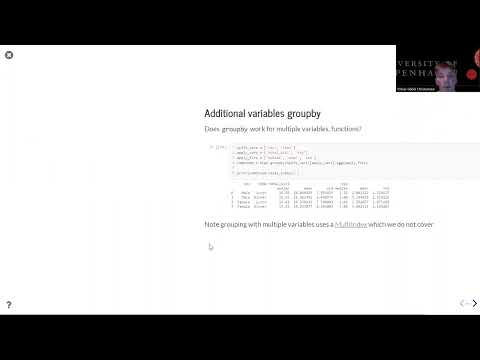

In [11]:
YouTubeVideo('pZinSHCRgbA', width=640, height=360)

*Note:* The Split-Apply-Combine method uses `.groupby()`. As indicated in the video, `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`. 

In [32]:
# INCLUDED IN ASSIGNMENT 1

weather_years["datetime_format"] = pd.to_datetime(weather_years['datetime'].astype(str))


weather_years['month'] = weather_years["datetime_format"].dt.month
weather_years['year'] = weather_years['datetime_format'].dt.year

weather_years['tmax_mean'] = weather_years.groupby(['month', 'year', 'station'])['obs_value'].transform('mean')
weather_years['tmax_median'] = weather_years.groupby(['month', 'year', 'station'])['obs_value'].transform('median')

weather_years

,station,datetime,obs_type,obs_value,datetime_format,month,year,tmax_mean,tmax_median
0,ASN00063004,18700809,TMAX,10.0,1870-08-09,8,1870,15.047826,15.6
1,ASN00063004,18700810,TMAX,8.9,1870-08-10,8,1870,15.047826,15.6
2,ASN00063004,18700811,TMAX,15.6,1870-08-11,8,1870,15.047826,15.6
3,ASN00063004,18700812,TMAX,16.7,1870-08-12,8,1870,15.047826,15.6
4,ASN00063004,18700813,TMAX,16.7,1870-08-13,8,1870,15.047826,15.6
...,...,...,...,...,...,...,...,...,...
141598,USW00094728,18751227,TMAX,10.6,1875-12-27,12,1875,3.890323,3.9
141599,USW00094728,18751228,TMAX,1.1,1875-12-28,12,1875,3.890323,3.9
141600,USW00094728,18751229,TMAX,2.8,1875-12-29,12,1875,3.890323,3.9
141601,USW00094728,18751230,TMAX,6.7,1875-12-30,12,1875,3.890323,3.9


> **Ex. 3.3.2:** Plot the monthly max, min, mean, first and third quartiles for maximum temperature for our station with the ID _'CA006110549'_ for the years 1870-1875. 

> *Hint*: the method `describe` computes all these measures.

In [59]:
# good fucking luck med at genskabe det her lort.


weather_years[weather_years['station'] == 'CA006110549'].groupby(['year',"month"])['obs_value'].describe().loc[:,['max', 'min','mean', '25%', '75%']]



max   min       mean     25%     75%
year month                                       
1870 1       7.2 -13.9  -0.426923  -1.100   1.700
     2       4.4 -10.0  -1.175000  -3.300   2.350
     3      12.8  -7.2   2.250000  -1.100   5.600
     12      8.9  -8.3   0.588889  -1.700   2.800
1871 1      12.8 -13.9  -1.519231  -6.500   3.025
     2       8.3 -13.3  -0.668000  -2.200   1.700
     3      12.2  -0.6   5.529630   3.050   8.050
     4      26.7   7.2  12.804000   8.300  15.600
     5      32.8  10.0  21.900000  15.000  28.900
     6      33.3  15.6  25.896154  22.200  30.400
     7      33.9  20.6  27.500000  24.550  31.100
     8      34.4  18.9  27.811111  26.100  30.000
     9      33.9  10.0  20.938462  14.325  26.100
     10     25.6   6.1  16.880769  12.925  21.275
     11     15.0 -11.1   3.842308   0.725   6.550
     12      7.2 -11.7  -2.942308  -6.100   0.000
1872 1      12.2 -11.1  -0.722222  -5.550   2.200
     2      11.1  -6.1   1.908000  -1.100   4.400
     3       6.1 -13.9  -1.000000  -2.650   2.075
     4      23.9  -1.1  10.765385   6.100  16.275
     5      27.8   5.0  19.903704  17.750  23.600
     6      35.0  15.6  27.112000  25.000  31.100
     7      35.6  20.0  25.751852  22.200  28.300
     8      31.7  16.1  26.618519  24.700  29.400
     9      34.4  13.3  22.440000  19.400  26.100
     10     23.3   3.9  14.385185  10.600  17.500
     11     12.8  -5.0   4.219231   1.100   7.800
     12      3.9 -18.3  -4.419231  -7.800  -0.150
1873 1       5.0 -16.1  -3.662963  -8.600   1.400
     2      10.0 -11.1  -1.045833  -4.600   3.450
     3       9.4 -11.1   2.734615   1.250   5.450
     4      17.8   3.3   8.846154   5.725  12.100
     5      30.6   7.8  18.874074  15.300  23.050
     6      35.6  18.9  27.556000  25.000  30.600
     7      31.1  16.7  26.018519  25.600  27.500
     8      31.7  19.4  25.672414  23.300  27.800
     9      31.1  11.1  20.626667  15.150  24.275
     10     24.4   1.7  12.777419   8.900  16.100
     11     12.8  -8.3   1.266667  -1.925   3.900
     12     12.2  -8.3   2.476667   0.725   3.900
1874 1      15.0 -15.0  -1.164516  -6.700   2.200
     2       6.1 -12.8  -1.653571  -5.000   3.300
     3      13.9  -8.9   2.183871  -1.400   5.850

> **Ex. 3.3.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1870-1875.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has *fixed width format* - does there exist a pandas reader for that? Here Google might be helpful!

In [68]:
new_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
data = pd.read_fwf(new_url, sep=" ", header=None)




In [69]:
cols = ['station','LATITUDE', 'Real LONGITUDE','Real ELEVATION', 'NAME', 'GSN FLAG', 'HCN/CRN FLAG','WMO ID']
data.columns = cols
data

,station,LATITUDE,Real LONGITUDE,Real ELEVATION,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0
...,...,...,...,...,...,...,...,...
122042,ZI000067969,21.0500,29.3670,861.0,WEST NICHOLSON,NaN,NaN,67969.0
122043,ZI000067975,20.0670,30.8670,1095.0,MASVINGO,NaN,NaN,67975.0
122044,ZI000067977,21.0170,31.5830,430.0,BUFFALO RANGE,NaN,NaN,67977.0
122045,ZI000067983,20.2000,32.6160,1132.0,CHIPINGE,NaN,GSN,67983.0


In [72]:
new_df = pd.merge(weather_years, data, on = 'station')
new_df


,station,datetime,obs_type,obs_value,datetime_format,month,year,tmax_mean,tmax_median,LATITUDE,Real LONGITUDE,Real ELEVATION,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
0,ASN00063004,18700809,TMAX,10.0,1870-08-09,8,1870,15.047826,15.6,33.4167,149.5500,704.0,BATHURST GAOL,NaN,NaN,NaN
1,ASN00063004,18700810,TMAX,8.9,1870-08-10,8,1870,15.047826,15.6,33.4167,149.5500,704.0,BATHURST GAOL,NaN,NaN,NaN
2,ASN00063004,18700811,TMAX,15.6,1870-08-11,8,1870,15.047826,15.6,33.4167,149.5500,704.0,BATHURST GAOL,NaN,NaN,NaN
3,ASN00063004,18700812,TMAX,16.7,1870-08-12,8,1870,15.047826,15.6,33.4167,149.5500,704.0,BATHURST GAOL,NaN,NaN,NaN
4,ASN00063004,18700813,TMAX,16.7,1870-08-13,8,1870,15.047826,15.6,33.4167,149.5500,704.0,BATHURST GAOL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141598,USC00064767,18751227,TMAX,10.6,1875-12-27,12,1875,2.087097,1.7,41.5500,-72.7167,112.5,MIDDLETOWN 4 W,NaN,NaN,NaN
141599,USC00064767,18751228,TMAX,-2.5,1875-12-28,12,1875,2.087097,1.7,41.5500,-72.7167,112.5,MIDDLETOWN 4 W,NaN,NaN,NaN
141600,USC00064767,18751229,TMAX,1.1,1875-12-29,12,1875,2.087097,1.7,41.5500,-72.7167,112.5,MIDDLETOWN 4 W,NaN,NaN,NaN
141601,USC00064767,18751230,TMAX,2.5,1875-12-30,12,1875,2.087097,1.7,41.5500,-72.7167,112.5,MIDDLETOWN 4 W,NaN,NaN,NaN


In [60]:
weather_years

,station,datetime,obs_type,obs_value,datetime_format,month,year,tmax_mean,tmax_median
0,ASN00063004,18700809,TMAX,10.0,1870-08-09,8,1870,15.047826,15.6
1,ASN00063004,18700810,TMAX,8.9,1870-08-10,8,1870,15.047826,15.6
2,ASN00063004,18700811,TMAX,15.6,1870-08-11,8,1870,15.047826,15.6
3,ASN00063004,18700812,TMAX,16.7,1870-08-12,8,1870,15.047826,15.6
4,ASN00063004,18700813,TMAX,16.7,1870-08-13,8,1870,15.047826,15.6
...,...,...,...,...,...,...,...,...,...
141598,USW00094728,18751227,TMAX,10.6,1875-12-27,12,1875,3.890323,3.9
141599,USW00094728,18751228,TMAX,1.1,1875-12-28,12,1875,3.890323,3.9
141600,USW00094728,18751229,TMAX,2.8,1875-12-29,12,1875,3.890323,3.9
141601,USW00094728,18751230,TMAX,6.7,1875-12-30,12,1875,3.890323,3.9


In [14]:
# INCLUDED IN ASSIGNMENT 1

##  Bonus Exercises

If you want to practice *split-apply-combine* a bit more before proceeding, we have generated two additional exercises that use the US census data from Part 1. In order to solve this exercise, you should use `df_census_new` which you generated in a previous exercise.
> **Ex. 3.3.4:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [15]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

> **Ex. 3.3.5:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ remember the `.query()` method is extremely useful for filtering data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Part 4: Reshaping  Dataframes

Often we have data that comes in a format that does not fit our purpose.

In [ ]:
YouTubeVideo('cJOo01dj5hs', width=640, height=360)

In this exercise, we continue working with the NOAA data that you worked with in the main section of part 3.

> **Ex. 3.4.1:** For which months was the temperature in general (i.e. use the mean) lower in 1870 vs. 1875?
>
> *Hint:* you may use `unstack`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()